# Plots for paper 1 #

Looking at the decadal predictability of surface variables over Europe

First set of plots will be a 2 x 2 matrix of skill plots (raw or lagged) for the different variables.

Then we will combine this with the long period lagged and var adjusted NAO plots.

In [1]:
# Local Imports
import os
import sys
import glob

# Third-Party Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Local imports
sys.path.append("/home/users/benhutch/skill-maps")
import dictionaries as dicts

# # Import functions from skill-maps
sys.path.append("/home/users/benhutch/skill-maps/python")
# import functions as fnc
import plotting_functions as plt_fnc

# Import functions
import functions as fnc

# Import functions from plot_init_benefit
sys.path.append("/home/users/benhutch/skill-maps/rose-suite-matching")
import plot_init_benefit as pib_fnc

# Import the nao_matching_seasons functions
import nao_matching_seasons as nao_match_fnc

# Import the functions from process_bs_values
import process_bs_values as pbs_func

In [3]:
# Set up global variables
bootstrap_base_dir = "/gws/nopw/j04/canari/users/benhutch/bootstrapping"
plots_dir = "/home/users/benhutch/skill-maps-europe"
region = "global"
forecast_range = "2-9"

# Set up the lists
seasons_list = ["DJFM", "MAM", "JJA", "SON"]
methods_list = ["raw", "lagged", "nao_matched"]
variables_list = ["tas", "sfcWind", "rsds", "psl"] # Will replace psl with pr at some point

### Testing bootstrapping function ###

The function *forecast_stats* generates all of the forecast stats, however, it currently only runs between 1969 and 2011 (?). We want to test this function so we can calculate the raw forecast stats from initialisation in 1961 to initialisation in 2014.

For now, we don't care about the historical models (forecast2).

In [4]:
# First we need to prepare the data for this
# Set up the parameters
variable = "tas"
season = "DJFM"
start_year = 1961 # first init year for BCC-CSM2-MR
end_year = 2014 # last valid init year for year 2-9 forecasts
method = "raw" # Raw forecast skill in the first instance
no_bootstraps = 1 # For speed, just do one bootstrap
base_dir = "/home/users/benhutch/skill-maps-processed-data"

In [5]:
# Set up the dcpp models for this variable
dcpp_models = nao_match_fnc.match_variable_models(match_var=variable)

match_var: tas


In [6]:
# Set up the observations path for the matching variable
obs_path = nao_match_fnc.find_obs_path(match_var=variable)

In [7]:
# Prrocess the observations
obs = fnc.process_observations(variable=variable,
                               region=region,
                               region_grid=dicts.gridspec_global,
                               forecast_range=forecast_range,
                               season=season,
                               observations_path=obs_path,
                               obs_var_name="t2m")

Gridspec file: /home/users/benhutch/gridspec/gridspec-global.txt
Variable is not ua or va, creating new file name
File already exists
Loading ERA5 data


Dataset loaded:  [[[[244.69833 244.69833 244.69833 ... 244.69833 244.69833 244.69833]
   [243.98952 244.31924 244.6137  ... 243.28072 243.4782  243.7462 ]
   [251.60124 254.06972 254.60045 ... 251.7088  251.54306 251.9345 ]
   ...
   [247.25496 247.31139 247.20207 ... 246.92172 247.02046 247.10509]
   [246.12299 246.09302 246.05775 ... 246.36102 246.27638 246.24112]
   [245.3895  245.33836 245.29428 ... 245.57993 245.5235  245.45827]]

  [[      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   ...
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]]]


 [[[237.64906 237.64906 237.64906 ... 237.64906 237.64906 237.64906]
   [236.95084 237.31229 237.63849 ... 236.36722 236.48006 236.7269

In [8]:
# Load and process the dcpp model data
dcpp_data = pbs_func.load_and_process_dcpp_data(base_dir=base_dir,
                                                dcpp_models=dcpp_models,
                                                variable=variable,
                                                region=region,
                                                forecast_range=forecast_range,
                                                season=season)

Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/tas/FGOALS-f3-L/global/years_2-9/DJFM/outputs/mergetime/mergetime_FGOALS-f3-L_tas_global_2-9_DJFM-r3i1.nc: [1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/tas/FGOALS-f3-L/global/years_2-9/DJFM/outputs/mergetime/mergetime_FGOALS-f3-L_tas_global_2-9_DJFM-r3i1.nc: [1981]-[1982]-[1984]
Member: /home/users/benhutch/skill-maps-processed-data/tas/FGOALS-f3-L/global/years_2-9/DJFM/outputs/mergetime/mergetime_FGOALS-f3-L_tas_global_2-9_DJFM-r3i1.nc has non-consecutive years
Will not be included in the analysis
Counter: 1
Non-consecutive years found in /home/users/benhutch/skill-maps-processed-data/tas/FGOALS-f3-L/globa

In [9]:
print((dcpp_data['BCC-CSM2-MR']))

[<xarray.DataArray 'tas' (time: 54, lat: 72, lon: 144)>
dask.array<open_dataset-12a634a671eaf9003072dad6be6c6c5btas, shape=(54, 72, 144), dtype=float32, chunksize=(50, 72, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1966-08-01 00:00:00 ... 2019-08-01 00:00:00
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5
    height   float64 ...
Attributes:
    CDI:                    Climate Data Interface version 2.0.4 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    source:                 BCC-CSM 2 MR (2017):   aerosol: none  atmos: BCC_...
    institution:            Beijing Climate Center, Beijing 100081, China
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                The model 10-year-long hindcast integration start...
    contact:          

In [10]:
# We want to make sure that the obs and dcpp data are aligned
dcpp_data = fnc.constrain_years(dcpp_data, dcpp_models)

In [11]:
print((dcpp_data['BCC-CSM2-MR']))

[<xarray.DataArray 'tas' (time: 54, lat: 72, lon: 144)>
dask.array<open_dataset-12a634a671eaf9003072dad6be6c6c5btas, shape=(54, 72, 144), dtype=float32, chunksize=(50, 72, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1966-08-01 00:00:00 ... 2019-08-01 00:00:00
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5
    height   float64 ...
Attributes:
    CDI:                    Climate Data Interface version 2.0.4 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    source:                 BCC-CSM 2 MR (2017):   aerosol: none  atmos: BCC_...
    institution:            Beijing Climate Center, Beijing 100081, China
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                The model 10-year-long hindcast integration start...
    contact:          

In [12]:
# Align the obs and dcpp data
obs, dcpp_data, _ = fnc.remove_years_with_nans_nao(observed_data=obs,
                                                   model_data=dcpp_data,
                                                   models=dcpp_models)

No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN values in the model data
No NaN v

In [13]:
print((dcpp_data['BCC-CSM2-MR']))
print((obs))

[<xarray.DataArray 'tas' (time: 54, lat: 72, lon: 144)>
dask.array<open_dataset-12a634a671eaf9003072dad6be6c6c5btas, shape=(54, 72, 144), dtype=float32, chunksize=(50, 72, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1966-08-01 00:00:00 ... 2019-08-01 00:00:00
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 80.0 82.5 85.0 87.5
    height   float64 ...
Attributes:
    CDI:                    Climate Data Interface version 2.0.4 (https://mpi...
    Conventions:            CF-1.7 CMIP-6.2
    source:                 BCC-CSM 2 MR (2017):   aerosol: none  atmos: BCC_...
    institution:            Beijing Climate Center, Beijing 100081, China
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                The model 10-year-long hindcast integration start...
    contact:          

In [14]:
# Convert obs to an array   
obs = obs.values

# Print the shapes of the obs data
print(np.shape(obs))

# Extract the years from the obs data
nyears = obs.shape[0]
lats = obs.shape[1]
lons = obs.shape[2]


(54, 72, 144)


In [15]:
# Covert dcpp_data to an array
# Create an empty array
dcpp_ensemble_members = np.sum([len(dcpp_data[model]) for model in dcpp_models])

# Create an empty array to store the data
dcpp_data_array = np.zeros([dcpp_ensemble_members, nyears, lats, lons])

# Create a dummy arrays of zeros to store the ensemble members
hist_data_array = np.zeros([dcpp_ensemble_members, nyears, lats, lons])

# Set up the member index
member_index = 0

# Loop over the models
for model in dcpp_models:
    dcpp_model_data = dcpp_data[model]

    # Loop over the ensemble members
    for member in dcpp_model_data:
        # Increment the member index
        member_index += 1

        # Extract the data
        data = member.values

        # If the data has four dimensions
        if len(data.shape) == 4:
            # Squeeze the data
            data = np.squeeze(data)

        # Assign the data to the forecast1 array
        dcpp_data_array[member_index-1, :, :, :] = data

        # Assign the data to the hist array
        hist_data_array[member_index-1, :, :, :] = data


In [16]:
# print the shape os the obs and dcpp data
print(np.shape(obs))

# print the shape of the dcpp data array
print(np.shape(dcpp_data_array))
print(np.shape(hist_data_array))

(54, 72, 144)
(160, 54, 72, 144)
(160, 54, 72, 144)


In [17]:
# # Fill the hist data array with 1s
# hist_data_array[:] = 1

In [18]:
# Print the dcpp data array
print(dcpp_data_array)

[[[[-0.59291077 -0.59291077 -0.59291077 ... -0.59291077 -0.59291077
    -0.59291077]
   [-0.46833801 -0.46414185 -0.45759583 ... -0.49092102 -0.48057556
    -0.47367859]
   [-0.5491333  -0.55078125 -0.55429077 ... -0.54212952 -0.54443359
    -0.55044556]
   ...
   [-1.12786865 -1.10322571 -1.08097839 ... -1.13116455 -1.14038086
    -1.14044189]
   [-1.23875427 -1.24555969 -1.24784851 ... -1.19094849 -1.21022034
    -1.22921753]
   [-1.34237671 -1.35189819 -1.36160278 ... -1.30303955 -1.31454468
    -1.33016968]]

  [[-0.51992798 -0.51992798 -0.51992798 ... -0.51992798 -0.51992798
    -0.51992798]
   [-0.71725464 -0.7215271  -0.71836853 ... -0.70368958 -0.70950317
    -0.71551514]
   [-0.80883789 -0.8129425  -0.81689453 ... -0.79020691 -0.79455566
    -0.80276489]
   ...
   [-2.91615295 -2.89082336 -2.85668945 ... -2.91036987 -2.90815735
    -2.90959167]
   [-2.78286743 -2.76725769 -2.74987793 ... -2.80429077 -2.79975891
    -2.79260254]
   [-2.89837646 -2.8911438  -2.88713074 ... -2.89

In [19]:
# Print the hist data array
print(hist_data_array)

[[[[-0.59291077 -0.59291077 -0.59291077 ... -0.59291077 -0.59291077
    -0.59291077]
   [-0.46833801 -0.46414185 -0.45759583 ... -0.49092102 -0.48057556
    -0.47367859]
   [-0.5491333  -0.55078125 -0.55429077 ... -0.54212952 -0.54443359
    -0.55044556]
   ...
   [-1.12786865 -1.10322571 -1.08097839 ... -1.13116455 -1.14038086
    -1.14044189]
   [-1.23875427 -1.24555969 -1.24784851 ... -1.19094849 -1.21022034
    -1.22921753]
   [-1.34237671 -1.35189819 -1.36160278 ... -1.30303955 -1.31454468
    -1.33016968]]

  [[-0.51992798 -0.51992798 -0.51992798 ... -0.51992798 -0.51992798
    -0.51992798]
   [-0.71725464 -0.7215271  -0.71836853 ... -0.70368958 -0.70950317
    -0.71551514]
   [-0.80883789 -0.8129425  -0.81689453 ... -0.79020691 -0.79455566
    -0.80276489]
   ...
   [-2.91615295 -2.89082336 -2.85668945 ... -2.91036987 -2.90815735
    -2.90959167]
   [-2.78286743 -2.76725769 -2.74987793 ... -2.80429077 -2.79975891
    -2.79260254]
   [-2.89837646 -2.8911438  -2.88713074 ... -2.89

In [20]:
# Process the forecast stats for the raw method
forecast_stats = fnc.forecast_stats(obs=obs,
                                    forecast1=dcpp_data_array,
                                    forecast2=hist_data_array,
                                    no_boot=no_bootstraps)

bootstrap index 0


shape of obs_boot (54, 72, 144)
value of obs_boot [[[-0.33045483 -0.33045483 -0.33045483 ... -0.33045483 -0.33045483
   -0.33045483]
  [ 0.0685873   0.0613327   0.056777   ...  0.09660244  0.08503675
    0.0775404 ]
  [ 0.45344448  0.36898041  0.34008694 ...  0.56890917  0.6135478
    0.67489147]
  ...
  [-2.9207201  -2.87762022 -2.82699251 ... -3.0544157  -3.05366898
   -2.99653006]
  [-3.05968046 -3.00549221 -2.95600605 ... -3.11596346 -3.12705708
   -3.08760262]
  [-3.3534379  -3.34084415 -3.32722664 ... -3.39448643 -3.38539743
   -3.37198544]]

 [[-0.21204472 -0.21204472 -0.21204472 ... -0.21204472 -0.21204472
   -0.21204472]
  [-0.04679251 -0.04743481 -0.04306364 ... -0.04610634 -0.0508399
   -0.0473156 ]
  [ 0.48060846  0.34666443  0.37953854 ...  0.69663095  0.76970148
    0.80426598]
  ...
  [-2.44206715 -2.41555214 -2.3829422  ... -2.52082729 -2.53925657
   -2.50184298]
  [-2.56317472 -2.52380896 -2.48484659 ... -2.57587385 -2.60024738
   -2.57649565]
  [-2.79863644 -2.7947487

/home/users/benhutch/skill-maps/python/functions.py:6385: RuntimeWarning: invalid value encountered in double_scalars
  r_partial_boot[iboot, lat, lon] = num / np.sqrt(denom_sq)


In [21]:
print(forecast_stats)

{'corr1': array([[ 0.73343128,  0.73116359,  0.73234231, ...,  0.73317636,
         0.73106705,  0.73356554],
       [ 0.47506643,  0.48550444,  0.4952798 , ...,  0.42474027,
         0.44385891,  0.45788659],
       [ 0.08828743,  0.24467764,  0.18784964, ..., -0.20727576,
        -0.31192982, -0.38408618],
       ...,
       [ 0.92808512,  0.93014587,  0.93202843, ...,  0.92224559,
         0.92490492,  0.92660106],
       [ 0.92201638,  0.92310795,  0.92493595, ...,  0.91868266,
         0.92000595,  0.92129476],
       [ 0.89215479,  0.8916982 ,  0.89097978, ...,  0.89356591,
         0.89270017,  0.89250255]]), 'corr1_min': array([[ 0.73343128,  0.73116359,  0.73234231, ...,  0.73317636,
         0.73106705,  0.73356554],
       [ 0.47506643,  0.48550444,  0.4952798 , ...,  0.42474027,
         0.44385891,  0.45788659],
       [ 0.08828743,  0.24467764,  0.18784964, ..., -0.20727576,
        -0.31192982, -0.38408618],
       ...,
       [ 0.92808512,  0.93014587,  0.93202843, ...,

### Next steps ###

We have now processed the data for one variable (tas), DJFM, years 2-9. To create the 2x2 matrix of plots for the different variables, we have to do this another three times to generate four dictionaries of forecast stats. It may therefore be worth condensing the above into a function.

In [22]:
from paper1_plots_functions import forecast_stats_var

In [23]:
# Use importlib to reload the module
import importlib

# Reload the module
importlib.reload(sys.modules['paper1_plots_functions'])

# Import the function again
from paper1_plots_functions import forecast_stats_var

In [24]:
# Test the forecast stats var function
forecast_stats_var_dic = forecast_stats_var(variables=dicts.paper_1_variables,
                                            season = season,
                                            forecast_range = forecast_range,
                                            start_year = start_year,
                                            end_year = end_year,
                                            method = method,
                                            no_bootstraps = no_bootstraps)

Processing tas...
obs_var_name = t2m
match_var: tas
Gridspec file: /home/users/benhutch/gridspec/gridspec-global.txt
Variable is not ua or va, creating new file name
File already exists
Loading ERA5 data


Dataset loaded:  [[[[244.69833 244.69833 244.69833 ... 244.69833 244.69833 244.69833]
   [243.98952 244.31924 244.6137  ... 243.28072 243.4782  243.7462 ]
   [251.60124 254.06972 254.60045 ... 251.7088  251.54306 251.9345 ]
   ...
   [247.25496 247.31139 247.20207 ... 246.92172 247.02046 247.10509]
   [246.12299 246.09302 246.05775 ... 246.36102 246.27638 246.24112]
   [245.3895  245.33836 245.29428 ... 245.57993 245.5235  245.45827]]

  [[      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   ...
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]]]


 [[[237.64906 237.64906 237.64906 ... 237.64906 237.64906 237.64906]
   [236.95084 237.31229 237.63849 ... 236.36722 236.48006 236.7269

/home/users/benhutch/skill-maps/python/functions.py:6385: RuntimeWarning: invalid value encountered in double_scalars
  r_partial_boot[iboot, lat, lon] = num / np.sqrt(denom_sq)


Finished processing tas!
Processing sfcWind...
obs_var_name = si10
match_var: sfcWind
Gridspec file: /home/users/benhutch/gridspec/gridspec-global.txt
Variable is not ua or va, creating new file name
File already exists
Loading ERA5 data
Dataset loaded:  [[[[3.9620347 3.9620347 3.9620347 ... 3.9620347 3.9620347 3.9620347]
   [5.58449   5.8022313 6.019349  ... 5.133409  5.30311   5.46938  ]
   [2.6867805 1.9265566 1.3968649 ... 1.2702122 1.1887932 1.7830591]
   ...
   [6.2227407 6.18905   6.107319  ... 6.242706  6.2302275 6.22586  ]
   [6.154112  6.120733  6.087978  ... 6.3147664 6.26579   6.234283 ]
   [6.068949  6.0468006 6.025276  ... 6.126348  6.1126223 6.0914097]]

  [[      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   ...
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...  

/home/users/benhutch/skill-maps/python/functions.py:6385: RuntimeWarning: invalid value encountered in double_scalars
  r_partial_boot[iboot, lat, lon] = num / np.sqrt(denom_sq)


Finished processing sfcWind!
Processing rsds...
obs_var_name = ssrd
match_var: rsds
Gridspec file: /home/users/benhutch/gridspec/gridspec-global.txt
Variable is not ua or va, creating new file name
File already exists
Loading ERA5 data
Dataset loaded:  [[[[33304760. 33304760. 33304760. ... 33304760. 33304760. 33304760.]
   [35274832. 35198748. 35127032. ... 35211220. 35253004. 35267348.]
   [34147296. 34167876. 34185336. ... 34681128. 34786524. 34506512.]
   ...
   [       0.        0.        0. ...        0.        0.        0.]
   [       0.        0.        0. ...        0.        0.        0.]
   [       0.        0.        0. ...        0.        0.        0.]]

  [[      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   ...
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...    

/home/users/benhutch/skill-maps/python/functions.py:6385: RuntimeWarning: invalid value encountered in double_scalars
  r_partial_boot[iboot, lat, lon] = num / np.sqrt(denom_sq)


Finished processing rsds!
Processing psl...
obs_var_name = msl
match_var: psl
Gridspec file: /home/users/benhutch/gridspec/gridspec-global.txt
Variable is not ua or va, creating new file name
File already exists
Loading ERA5 data
Dataset loaded:  [[[[100441.25  100441.25  100441.25  ... 100441.25  100441.25
    100441.25 ]
   [ 99956.96   99949.89   99938.24  ... 100008.12   99992.734
     99973.734]
   [ 99372.84   99429.414  99346.5   ...  99315.445  99202.03
     99230.18 ]
   ...
   [103048.07  103076.63  103104.36  ... 102961.27  102991.36
    103020.336]
   [102941.17  102960.586 102981.38  ... 102875.04  102897.77
    102917.19 ]
   [102773.83  102784.78  102795.32  ... 102740.555 102752.75
    102763.43 ]]

  [[       nan        nan        nan ...        nan        nan
           nan]
   [       nan        nan        nan ...        nan        nan
           nan]
   [       nan        nan        nan ...        nan        nan
           nan]
   ...
   [       nan        nan      

/home/users/benhutch/skill-maps/python/functions.py:6385: RuntimeWarning: invalid value encountered in double_scalars
  r_partial_boot[iboot, lat, lon] = num / np.sqrt(denom_sq)


Finished processing psl!


In [25]:
print((forecast_stats_var_dic['rsds']))

{'corr1': array([[ 6.09602286e-01,  6.12276372e-01,  6.09555496e-01, ...,
         6.07753819e-01,  6.09232986e-01,  6.14817394e-01],
       [ 5.71914941e-01,  5.50106441e-01,  5.35186796e-01, ...,
         5.55780895e-01,  5.54594430e-01,  5.61608340e-01],
       [ 5.45310846e-01,  5.35289472e-01,  5.09781758e-01, ...,
         6.44504097e-01,  6.05221064e-01,  5.71652093e-01],
       ...,
       [-6.30709960e-03,  2.48626187e-02,  8.63097298e-02, ...,
        -7.48930483e-02,  5.50151051e-04,  1.05218416e-02],
       [ 7.04783481e-02,  1.40666403e-01,  2.52588149e-01, ...,
        -6.56399044e-02, -6.49541776e-02, -2.04880209e-02],
       [ 6.01351882e-01,  6.06866273e-01,  6.07929376e-01, ...,
         5.22766507e-01,  5.51697653e-01,  5.74190400e-01]]), 'corr1_min': array([[ 6.09602286e-01,  6.12276372e-01,  6.09555496e-01, ...,
         6.07753819e-01,  6.09232986e-01,  6.14817394e-01],
       [ 5.71914941e-01,  5.50106441e-01,  5.35186796e-01, ...,
         5.55780895e-01,  5.545

In [26]:
# Now we want to plot this data
# Use importlib to reload the module
import importlib

# Reload the module
importlib.reload(sys.modules['paper1_plots_functions'])

# Import the function again
from paper1_plots_functions import forecast_stats_var, plot_forecast_stats_var

Plotting variable tas...
Plotting index 0...
start_year = 1961
end_year = 2014
nens1 = 160
for variable tas
Constraining data to gridbox_plot...
As defined by gridbox_plot =  {'lon1': -70, 'lon2': 40, 'lat1': 20, 'lat2': 90}
Calculating the correlations with a specific gridbox...
As defined by gridbox_corr =  {'lon1': -10, 'lon2': 3, 'lat1': 50, 'lat2': 60}
Plotting variable sfcWind...
Plotting index 1...
start_year = 1961
end_year = 2014
nens1 = 98
for variable sfcWind
Constraining data to gridbox_plot...
As defined by gridbox_plot =  {'lon1': -70, 'lon2': 40, 'lat1': 20, 'lat2': 90}
Calculating the correlations with a specific gridbox...
As defined by gridbox_corr =  {'lon1': -10, 'lon2': 3, 'lat1': 50, 'lat2': 60}
Plotting variable rsds...
Plotting index 2...
start_year = 1961
end_year = 2014
nens1 = 146
for variable rsds
Constraining data to gridbox_plot...
As defined by gridbox_plot =  {'lon1': -70, 'lon2': 40, 'lat1': 20, 'lat2': 90}
Calculating the correlations with a specific g

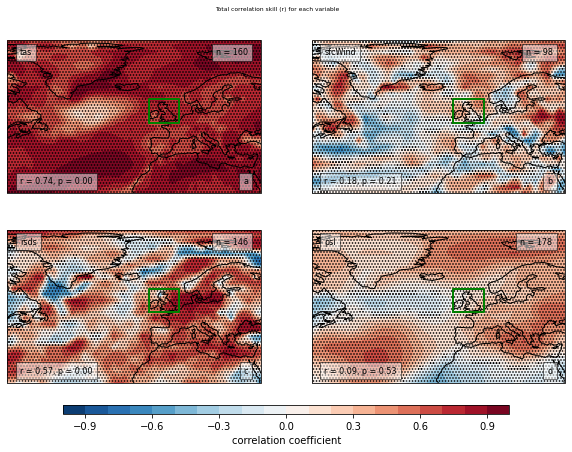

In [27]:
# Test this new function
plot_forecast_stats_var(forecast_stats_var_dic=forecast_stats_var_dic,
                        figsize_x=10,
                        figsize_y=8,
                        gridbox_corr=dicts.uk_grid,
                        gridbox_plot=dicts.north_atlantic_grid_plot)

In [28]:
print((forecast_stats_var_dic['sfcWind']['corr1_p']))

corr1_p = forecast_stats_var_dic['sfcWind']['corr1_p']

print((corr1_p[0, 0]))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.0


In [29]:
# Now we want to plot this data
# Use importlib to reload the module
import importlib

# Reload the module
importlib.reload(sys.modules['paper1_plots_functions'])

# Import the function again
from paper1_plots_functions import forecast_stats_var, plot_forecast_stats_var

In [30]:
# Now change the season to JJA
forecast_stats_var_dic = forecast_stats_var(variables=dicts.paper_1_variables,
                                            season = "JJA",
                                            forecast_range = forecast_range,
                                            start_year = start_year,
                                            end_year = end_year,
                                            method = method,
                                            no_bootstraps = no_bootstraps)

Processing tas...
obs_var_name = t2m
match_var: tas
Gridspec file: /home/users/benhutch/gridspec/gridspec-global.txt
Variable is not ua or va, creating new file name
File already exists
Loading ERA5 data
Dataset loaded:  [[[[244.69833 244.69833 244.69833 ... 244.69833 244.69833 244.69833]
   [243.98952 244.31924 244.6137  ... 243.28072 243.4782  243.7462 ]
   [251.60124 254.06972 254.60045 ... 251.7088  251.54306 251.9345 ]
   ...
   [247.25496 247.31139 247.20207 ... 246.92172 247.02046 247.10509]
   [246.12299 246.09302 246.05775 ... 246.36102 246.27638 246.24112]
   [245.3895  245.33836 245.29428 ... 245.57993 245.5235  245.45827]]

  [[      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   ...
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   [

/home/users/benhutch/skill-maps/python/functions.py:6385: RuntimeWarning: invalid value encountered in double_scalars
  r_partial_boot[iboot, lat, lon] = num / np.sqrt(denom_sq)


Finished processing tas!
Processing sfcWind...
obs_var_name = si10
match_var: sfcWind
Gridspec file: /home/users/benhutch/gridspec/gridspec-global.txt
Variable is not ua or va, creating new file name
File already exists
Loading ERA5 data
Dataset loaded:  [[[[3.9620347 3.9620347 3.9620347 ... 3.9620347 3.9620347 3.9620347]
   [5.58449   5.8022313 6.019349  ... 5.133409  5.30311   5.46938  ]
   [2.6867805 1.9265566 1.3968649 ... 1.2702122 1.1887932 1.7830591]
   ...
   [6.2227407 6.18905   6.107319  ... 6.242706  6.2302275 6.22586  ]
   [6.154112  6.120733  6.087978  ... 6.3147664 6.26579   6.234283 ]
   [6.068949  6.0468006 6.025276  ... 6.126348  6.1126223 6.0914097]]

  [[      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   ...
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...  

/home/users/benhutch/skill-maps/python/functions.py:6385: RuntimeWarning: invalid value encountered in double_scalars
  r_partial_boot[iboot, lat, lon] = num / np.sqrt(denom_sq)


Finished processing sfcWind!
Processing rsds...
obs_var_name = ssrd
match_var: rsds
Gridspec file: /home/users/benhutch/gridspec/gridspec-global.txt
Variable is not ua or va, creating new file name
File already exists
Loading ERA5 data
Dataset loaded:  [[[[33304760. 33304760. 33304760. ... 33304760. 33304760. 33304760.]
   [35274832. 35198748. 35127032. ... 35211220. 35253004. 35267348.]
   [34147296. 34167876. 34185336. ... 34681128. 34786524. 34506512.]
   ...
   [       0.        0.        0. ...        0.        0.        0.]
   [       0.        0.        0. ...        0.        0.        0.]
   [       0.        0.        0. ...        0.        0.        0.]]

  [[      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   ...
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...    

/home/users/benhutch/skill-maps/python/functions.py:6385: RuntimeWarning: invalid value encountered in double_scalars
  r_partial_boot[iboot, lat, lon] = num / np.sqrt(denom_sq)
/apps/jasmin/jaspy/miniconda_envs/jaspy3.10/m3-4.9.2/envs/jaspy3.10-m3-4.9.2-r20220721/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Finished processing rsds!
Processing psl...
obs_var_name = msl
match_var: psl
Gridspec file: /home/users/benhutch/gridspec/gridspec-global.txt
Variable is not ua or va, creating new file name
File already exists
Loading ERA5 data
Dataset loaded:  [[[[100441.25  100441.25  100441.25  ... 100441.25  100441.25
    100441.25 ]
   [ 99956.96   99949.89   99938.24  ... 100008.12   99992.734
     99973.734]
   [ 99372.84   99429.414  99346.5   ...  99315.445  99202.03
     99230.18 ]
   ...
   [103048.07  103076.63  103104.36  ... 102961.27  102991.36
    103020.336]
   [102941.17  102960.586 102981.38  ... 102875.04  102897.77
    102917.19 ]
   [102773.83  102784.78  102795.32  ... 102740.555 102752.75
    102763.43 ]]

  [[       nan        nan        nan ...        nan        nan
           nan]
   [       nan        nan        nan ...        nan        nan
           nan]
   [       nan        nan        nan ...        nan        nan
           nan]
   ...
   [       nan        nan      

/home/users/benhutch/skill-maps/python/functions.py:6385: RuntimeWarning: invalid value encountered in double_scalars
  r_partial_boot[iboot, lat, lon] = num / np.sqrt(denom_sq)


Finished processing psl!


Plotting variable tas...
Plotting index 0...
start_year = 1961
end_year = 2014
nens1 = 160
for variable tas
Constraining data to gridbox_plot...
As defined by gridbox_plot =  {'lon1': -70, 'lon2': 40, 'lat1': 20, 'lat2': 90}
Calculating the correlations with a specific gridbox...
As defined by gridbox_corr =  {'lon1': -10, 'lon2': 3, 'lat1': 50, 'lat2': 60}
Plotting variable sfcWind...
Plotting index 1...
start_year = 1961
end_year = 2014
nens1 = 101
for variable sfcWind
Constraining data to gridbox_plot...
As defined by gridbox_plot =  {'lon1': -70, 'lon2': 40, 'lat1': 20, 'lat2': 90}
Calculating the correlations with a specific gridbox...
As defined by gridbox_corr =  {'lon1': -10, 'lon2': 3, 'lat1': 50, 'lat2': 60}
Plotting variable rsds...
Plotting index 2...
start_year = 1961
end_year = 2014
nens1 = 146
for variable rsds
Constraining data to gridbox_plot...
As defined by gridbox_plot =  {'lon1': -70, 'lon2': 40, 'lat1': 20, 'lat2': 90}
Calculating the correlations with a specific 

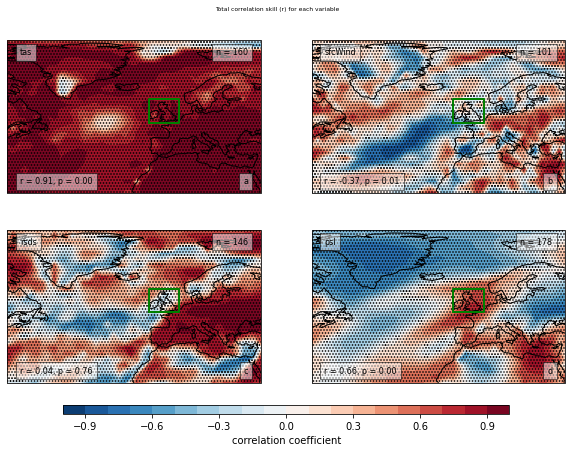

In [31]:
# And plot this
plot_forecast_stats_var(forecast_stats_var_dic=forecast_stats_var_dic,
                        figsize_x=10,
                        figsize_y=8,
                        gridbox_corr=dicts.uk_grid,
                        gridbox_plot=dicts.north_atlantic_grid_plot)

In [21]:
# Exploring bootstrapped
# corr1_p output for psl JJA 1000 bootstraps
dir = "/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/JJA/2-9/raw/no_bootstraps_1000"
filename="corr1_p_psl_global_JJA_2-9.npy"

# Load the data
corr1_p_psl_jja = np.load(os.path.join(dir, filename))

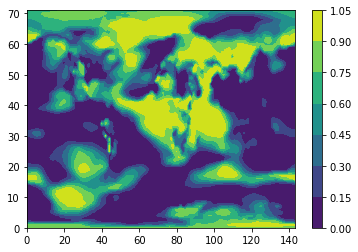

In [24]:
# Plot a contour plot of this
# With axis 0 on the y axis and axis 1 on the x axis
plt.contourf(corr1_p_psl_jja[:, :])

# Include a colorbar
plt.colorbar()

(array([1235.,  449.,  308.,  285.,  269.,  221.,  233.,  208.,  189.,
         159.,  155.,  142.,  128.,  119.,  117.,  101.,   78.,   97.,
          74.,   78.,   77.,   66.,   89.,   67.,   66.,   76.,   64.,
          59.,   55.,   68.,   63.,   67.,   53.,   54.,   51.,   53.,
          54.,   55.,   62.,   64.,   59.,   54.,   51.,   61.,   52.,
          46.,   44.,   44.,   47.,   44.,   56.,   46.,   59.,   52.,
          59.,   52.,   62.,   58.,   52.,   51.,   66.,   58.,   55.,
          58.,   65.,   62.,   61.,   57.,   60.,   69.,   68.,   72.,
          90.,   80.,   94.,   93.,   68.,   73.,   91.,   70.,   62.,
          77.,   61.,  199.,   62.,   58.,   63.,   64.,   65.,   95.,
          67.,   80.,  104.,   91.,   98.,  102.,  134.,  119.,  132.,
         268.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

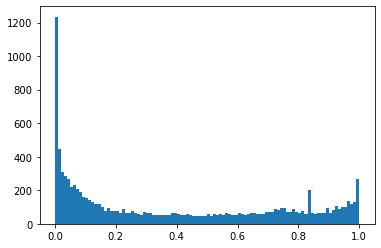

In [22]:
# Flatten this array
corr1_p_psl_jja_flat = corr1_p_psl_jja.flatten()

# Plot a pdf of this
plt.hist(corr1_p_psl_jja_flat, bins=100)